In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

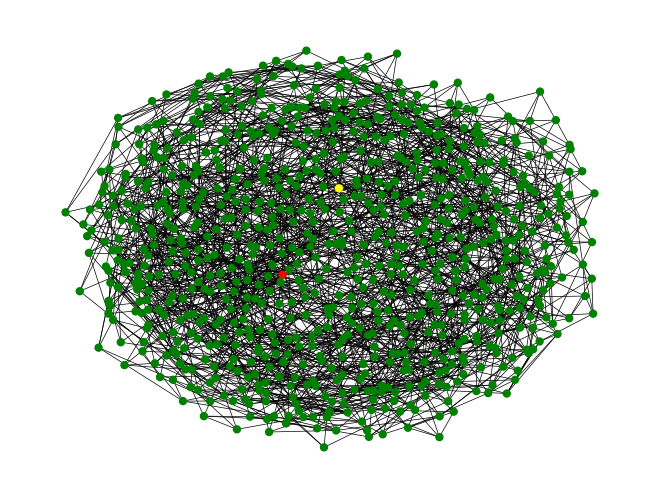

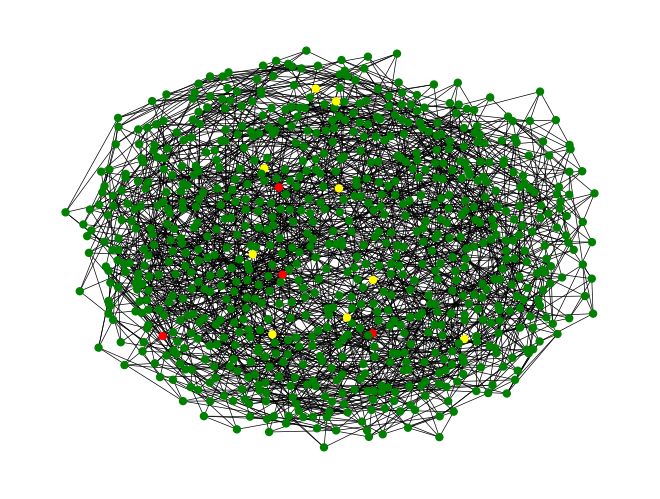

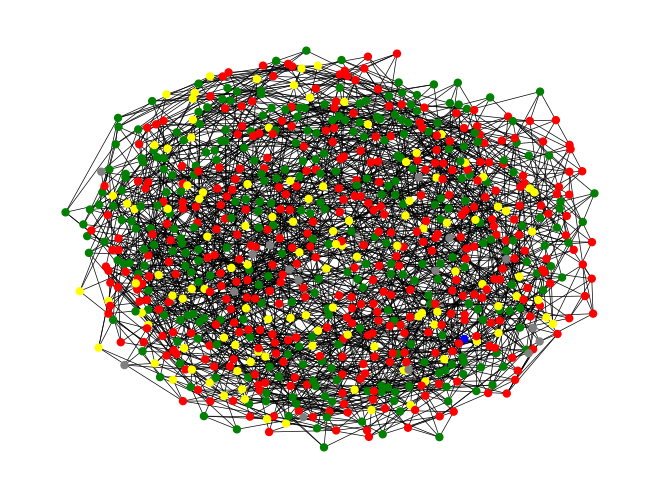

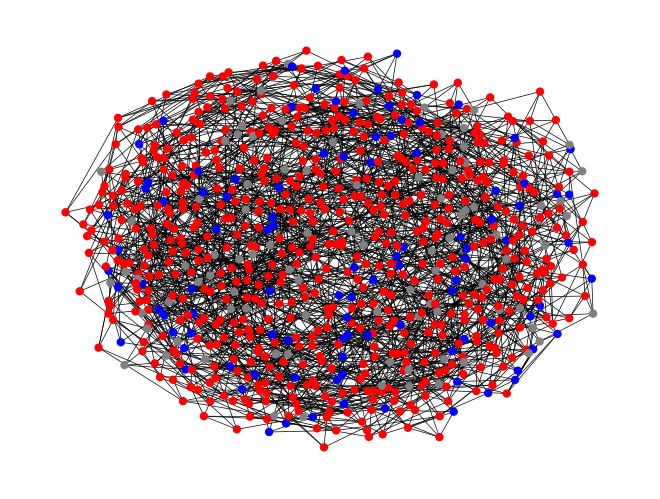

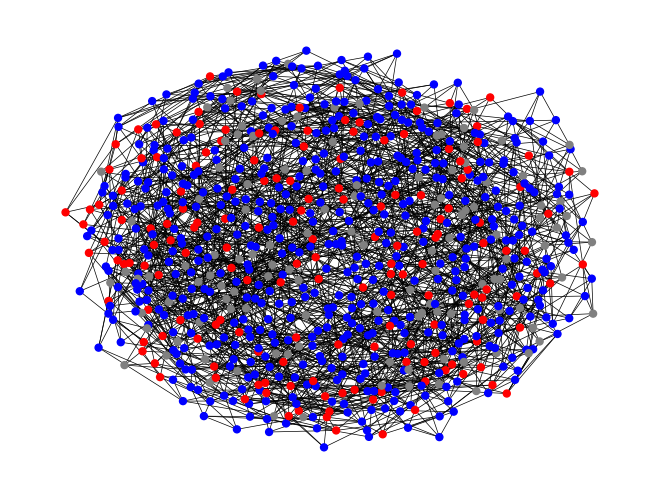

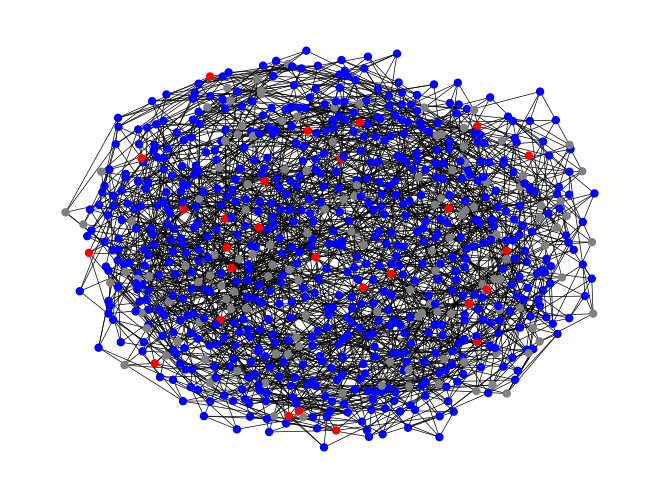

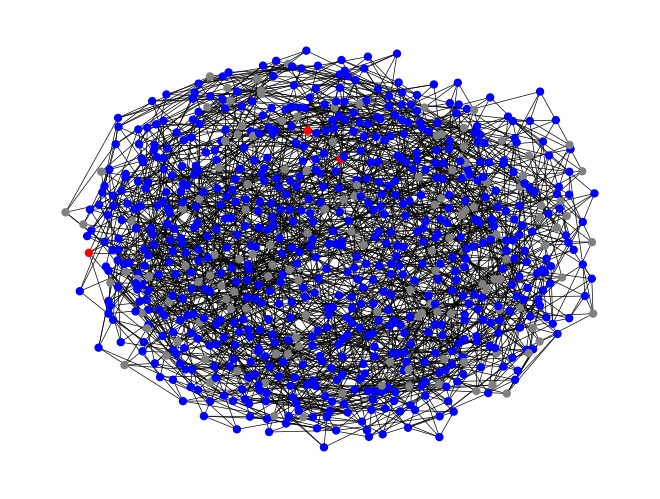

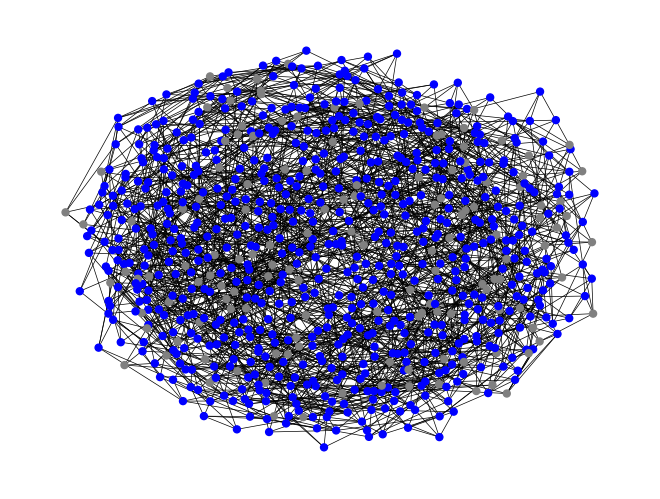

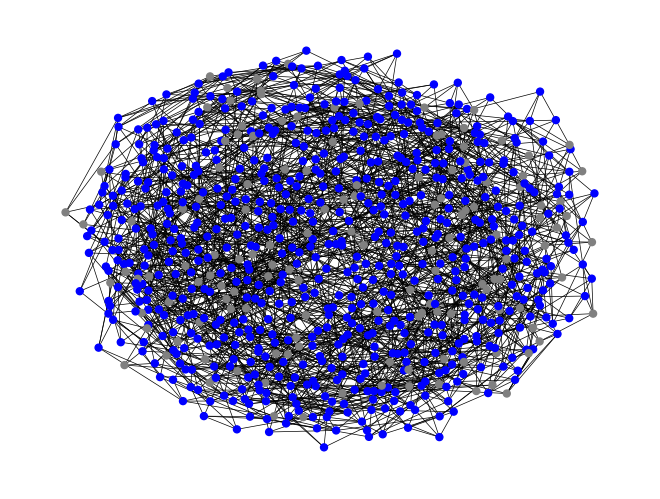

In [2]:
# Crear la red Watts-Strogatz
G = nx.watts_strogatz_graph(800, 7, 0.3)
'''
donde el primer argumento es el numero de personas (nodos),
el segundo corresponde al circulo social por persona (k vecinos)
y el segundo es algo asi como la diversidad de ese circulo social (?)
(probabilidad de reconexion)
'''


# Inicializar atributos
nx.set_node_attributes(G, 'S', 'estado')
nx.set_node_attributes(G, 0, 'time')

'''
Los atributos constan de un estado para Susceptible, Infectado, Recuperado, Muerto,
ademas de contar con el tiempo en dias de la duracion del atributo estado que tenga.
'''


# Configuración inicial: un nodo infectado
initial_infectado_node = np.random.randint(0,len(G))
G.nodes[initial_infectado_node]['estado'] = 'I'

# Parámetros del modelo SIR
beta = 0.2  # Tasa de transmisión
gamma = 0.15  # Tasa de recuperación
alpha = 0.01 # Tasa de mortalidad

timefinal = 120 #Tiempo final
recuperation_time_promedio = 15 #Tiempo de recuperacion promedio
recuperation_time_max = 60      #Tiempo maximo de recuperacion
incuvation_time_promedio = 10   #Tiempo de incuvacion promedio
incuvation_time_max = 30        #Tiempo maximo de incuvacion


# Parámetros del vuelo de Lévy // Un tiempo de recuparacion personalizado (para cada nodo)
sigma = 2.5
recuperation_time = recuperation_time = np.clip(np.random.normal(recuperation_time_promedio, sigma, len(G)), 0, recuperation_time_max)
incuvation_time = recuperation_time = np.clip(np.random.normal(incuvation_time_promedio, sigma, len(G)), 0, incuvation_time_max)

#Datos de los casos
susceptibles = np.zeros(timefinal)
infectados = np.ones(timefinal)
recuperados = np.zeros(timefinal)
muertes = np.zeros(timefinal)
expuestos = np.zeros(timefinal)

susceptibles[0] = len(G)-1 #Cantidad de susceptibles inicialmente


# Simulación del modelo SIR
for t in range(0, timefinal):  # Ciclo for hasta t=55

    #Conteo de variables
    actual_infectado = 0
    actual_recuperado = 0
    actual_muertes = 0
    actual_expuestos = 0

    #identificar los nodos infectados y aumento de tiempo global 
    nodos_infectados = []
    for node, data in G.nodes(data=True):
        data['time'] += 1
        
        #Tiempo en el que un expuesto se vuelve infeccioso
        if (G.nodes[node]['estado'] == 'E' and data['time'] > incuvation_time[node]) : 
            G.nodes[node]['estado'] = 'I'
            G.nodes[node]['time'] = 0
            actual_expuestos -=1

        if data['estado'] == 'I':
            nodos_infectados.append(node)

    actual_infectado = len(nodos_infectados) #Cuenta los infectados del dia


    for node in nodos_infectados:

        # Aplicar reglas del modelo SIR
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if G.nodes[neighbor]['estado'] == 'S':
                if np.random.rand() < beta:
                    #Nueva expocision 
                    G.nodes[neighbor]['estado'] = 'E'
                    G.nodes[node]['time'] = 0
                    actual_expuestos += 1 

        # Probabilidad de recuperación
        if (np.random.rand() < gamma and G.nodes[node]['time'] > recuperation_time[node]):
            actual_recuperado += 1
            G.nodes[node]['estado'] = 'R'
            G.nodes[node]['time'] = 0
        
        #Probabilidad de muerte
        elif np.random.rand() < alpha :
            actual_muertes += 1
            G.nodes[node]['estado'] = 'M'
            G.nodes[node]['time'] = 0
    

    infectados[t] = actual_infectado - actual_recuperado - actual_muertes
    recuperados[t] = recuperados[t-1] + actual_recuperado
    muertes[t] = muertes[t-1] + actual_muertes
    expuestos[t] = expuestos[t-1] + actual_expuestos
    susceptibles[t] = len(G) - infectados[t] - recuperados[t] - muertes[t] -  expuestos[t]

    if t%10==0 and t<80:

        # Visualización del resultado final
        plt.figure()
        colors = {'S': 'green', 'I': 'red', 'R': 'blue', 'M' : 'gray', 'E': 'yellow'}
        node_colors = [colors[G.nodes[node]['estado']] for node in G.nodes()]
        nx.draw_kamada_kawai(G, with_labels=False, node_color=node_colors, node_size= 25, width = 0.5)
    

plt.figure()
colors = {'S': 'green', 'I': 'red', 'R': 'blue', 'M' : 'gray', 'E': 'yellow'}
node_colors = [colors[G.nodes[node]['estado']] for node in G.nodes()]
nx.draw_kamada_kawai(G, with_labels=False, node_color=node_colors, node_size= 25, width = 0.5)

camino más largo entre dos nodos: 7
maximo pico de infectados: 714.0
maximo pico de expuestos: 113.0
Dia donde desde que no hubo susceptibles: 29
Recuperados final: 664.0


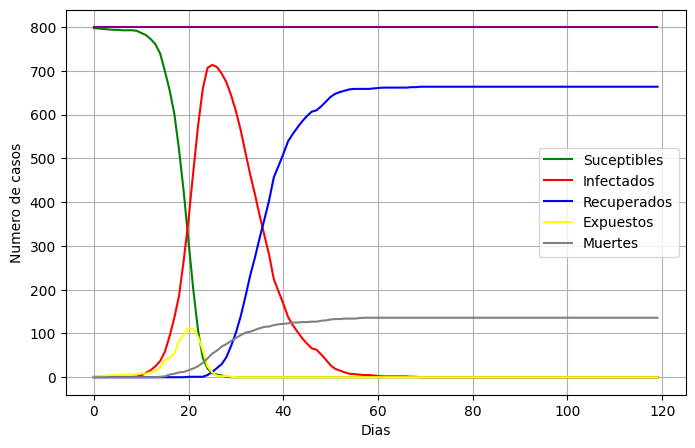

In [3]:
fig, ax = plt.subplots(figsize= (8,5))
ax.plot(np.arange(0,timefinal),susceptibles, label ='Suceptibles' , color = 'g')
ax.plot(np.arange(0,timefinal),infectados, label ='Infectados' , color = 'r')
ax.plot(np.arange(0,timefinal),recuperados, label ='Recuperados' , color = 'b')
ax.plot(np.arange(0,timefinal),expuestos, label ='Expuestos' , color = 'yellow')
ax.plot(np.arange(0,timefinal),muertes, label ='Muertes' , color = 'gray')
ax.plot(np.arange(0,timefinal),susceptibles+infectados+recuperados+ muertes + expuestos, color = 'purple')
#ax.set_ylim(0,20)
#ax.set_xlim(0,15)
ax.set_xlabel('Dias')
ax.set_ylabel('Numero de casos')
ax.grid(True)
ax.legend()

print("camino más largo entre dos nodos:", nx.diameter(G))
print("maximo pico de infectados:", max(infectados))
print("maximo pico de expuestos:", max(expuestos))
print("Dia donde desde que no hubo susceptibles:", np.where(susceptibles == 0)[0][0])
print("Recuperados final:", recuperados[-1])

In [4]:
nx.diameter(G)

7

9.92115846275006 15 2.5444957364450747 16.443753282307597 2.5130441363969593


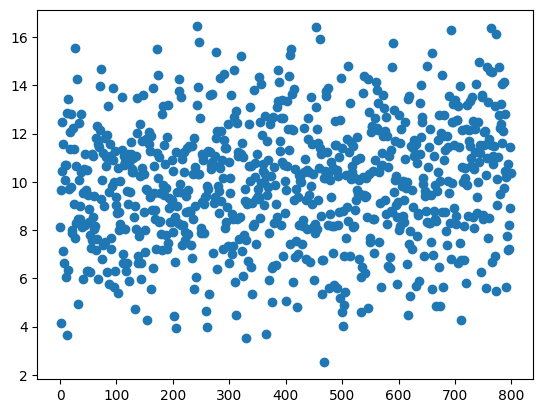

In [5]:

plt.scatter(np.arange(len(G)), recuperation_time)   
print(recuperation_time.mean(), recuperation_time_promedio, recuperation_time.std(),  recuperation_time.max(),recuperation_time.min()  )

In [6]:
G.nodes[1]['time'] = 0